#Kelompok E:

*  11230940000006 - Ahmad Farhan Sarofi
*  11230940000010 - Siti Nuryani
*  11230940000012 - Nia Amalia
*  11230940000043 - Muhammad Alwan Syechan
*  11230940000064 - Muhamad Raffy Izzudin

# **TUGAS DATA MINING STUDY CASE 1**

#Kasus:
Anda adalah seorang Data Analyst yang bekerja di PT Ray Pink Property Indonesia (RPPI).
RPPI adalah perusahaan property yang berdiri sejak 11 tahun yang lalu.
RPPI memliki kantor cabang di 7 propinsi di Indonesia dan jumlahnya terus bertambah.
Valuasi RPPI tahun ini mencapai Rp 7 Trilyun, meningkat 7% dari tahun sebelumnya.
Bidang usaha RPPI adalah investasi dan jual-beli property secara umum, termasuk bekerja sama dengan developer perumahan.
Data Engineer (DE)/Database Administrator (DBA) RPPI berhasil mengumpulkan data rumah-rumah yang dijual di beberapa kota di Indonesia.
Sebagai Data Analyst anda akan hadir dan melakukan presentasi pada rapat direksi untuk memberikan insight dari data ke upper management (C-Level, senior managers, dan komisaris perusahaan).
Di studi kasus ini anda mempersiapkan "bahan presentasi" dengan cara melakukan EDA pada data yang diterima dari DE/DBA.

#Petunjuk:
Di studi kasus pertama, anda mendapat bantuan keterangan dari manajemen. Setelah berdiskusi over lunch dengan beberapa manager senior, anda mendengar bahwa mereka ingin mengetahui:

Kualitas data yang dimiliki perusahaan.
Apakah ada saran perbaikan data ke DE/DBA perusahaan agar RPPI menjadi data driven company yang unggul.
Dari data yang ada, apakah ada kecenderungan rumah disuatu kota lebih mahal/murah dibandingkan kota lain?
Dari data yang ada, apakah bisa dibuat rekomendasi sebaiknya RPPI membuat kantor cabang berikutnya di kota mana? Mengapa? (Asumsikan RPPI belum memiliki cabang di kota-kota yang disebutkan di data).
Rumah dengan karakteristik seperti apa yang paling banyak dijual?
Jika RPPI ingin melakukan investasi (max) Rp. 25 Milyar minggu besok, apakah dari data anda dapat memberikan rekomendasi rumah mana saja yang akan berpotensi menghasilkan keuntungan bagi perusahaan?
Dan yang terpenting, informasi berharga apa lagi yang bisa anda dapatkan dari data?

#Catatan:
Anda diperbolehkan melakukan augmentasi data (menambah data eksternal).
Yakinkan menuliskan asumsi anda atas kesimpulan dan rekomendasi yang diberikan ke perusahaan.
Yakinkan kesimpulan dan rekomendasi ditujukan ke perusahaan (bukan dosen mata kuliah).
Anda boleh menggunakan software visualisasi apapun, misal excel, Ms Word, Photoshop, dsb.
Yakinkan file images dapat dibuka (nampak) saat ipynb di Jupyter notebook anda dibuka di Google Colab.
Tips: hati-hati dalam melakukan penamaan file, Google colab case sensitive.
Interpretasi diberikan menggunakan cell markdown tepat dibawah output code yang relevan diatasnya.
Anda tidak diperkenankan bertanya pertanyaan yang:
Merupakan jawaban atau menjurus ke jawaban studi kasus.
Debugging - code error (anda diharapkan melakukan code troubleshooting sendiri via mesin pencari)
Pada studi kasus ini anda hanya diperkenankan untuk melakukan EDA (bukan modeling seperti prediksi/forecasting)



#Data Understanding (DU):
Keterangan Varabel:



*   Created_at: Tanggal dimana iklan rumah dibuat
* LT : Luas Tanah properti yang ditawarkan
* LB : Luas Bangunan properti yang ditawarkan
* KT : Jumlah Kamar Tidur properti yang ditawarkan
* KM : Jumlah Kamar Mandi properti yang ditawarkan
* Garasi : Jumlah Kapasitas Garasi di properti yang ditawarkan
* Carport : Kapasitas Carport di properti yang ditawarkan
* Lokasi : Detail lokasi properti yang ditawarkan
* Sertifikat: Jenis sertifikat properti yang ditawarkan
* Listrik : Daya listrik dari properti yang ditawarkan
* Hadap : Keterangan property yang ditawarkan menghadap ke arah mana
* Harga : Harga property yang ditawarkan dalam Rupiah
* URL : Alamat tautan (link) property yang ditawarkan.
* Deskripsi : Deskripsi iklan property yang ditawarkan.


In [1]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
!mkdir data
!wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/jakarta.csv
!wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/depok.csv
!wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/bogor.csv
!wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/tangerang.csv
!wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/bekasi.csv
dfJakarta = pd.read_csv("data/jakarta.csv")
dfDepok = pd.read_csv("data/depok.csv")
dfBogor = pd.read_csv("data/bogor.csv")
dfTangerang = pd.read_csv("data/tangerang.csv")
dfBekasi = pd.read_csv("data/bekasi.csv")

--2025-09-30 07:53:33--  https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/jakarta.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63832 (62K) [text/plain]
Saving to: ‘data/jakarta.csv’

jakarta.csv         100%[===================>]  62.34K  --.-KB/s    in 0.01s   

2025-09-30 07:53:33 (5.63 MB/s) - ‘data/jakarta.csv’ saved [63832/63832]

--2025-09-30 07:53:33--  https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/depok.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.


In [2]:
# Cek struktur masing-masing DataFrame (5 baris awal)
print("=== Jakarta ===")
display(dfJakarta.head())
print("=== Depok ===")
display(dfDepok.head())
print("=== Bogor ===")
display(dfBogor.head())
print("=== Tangerang ===")
display(dfTangerang.head())
print("=== Bekasi ===")
display(dfBekasi.head())

# Cek jumlah baris & kolom per dataset
print("Shape Jakarta:", dfJakarta.shape)
print("Shape Depok:", dfDepok.shape)
print("Shape Bogor:", dfBogor.shape)
print("Shape Tangerang:", dfTangerang.shape)
print("Shape Bekasi:", dfBekasi.shape)

=== Jakarta ===


,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


=== Depok ===


,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,6-12-2021,165,200.0,4.0,2.0,NaN,1.0,Sukmajaya,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6-12-2021,50,36.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cimanggis,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6-12-2021,72,45.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


=== Bogor ===


,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,03-12-2021,75.0,38.0,2.0,1.0,1.0,1.0,Bojonggede,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06-12-2021,60.0,40.0,1.0,1.0,0.0,1.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06-12-2021,60.0,50.0,2.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06-12-2021,60.0,70.0,3.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06-12-2021,90.0,60.0,3.0,2.0,0.0,2.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


=== Tangerang ===


,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,12-06-2021,60.0,50.0,3.0,2.0,NaN,NaN,"BSD CITY, TANGERANG",SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12-06-2021,72.0,54.0,2.0,1.0,1.0,1.0,"CISAUK, TANGERANG",SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12-06-2021,60.0,48.0,3.0,2.0,2.0,2.0,"CILEDUG, TANGERANG",SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12-06-2021,200.0,225.0,5.0,4.0,NaN,NaN,"LIPPO KARAWACI, TANGERANG",SHM,5500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12-06-2021,76.0,123.0,3.0,3.0,NaN,2.0,"PONDOK CABE, TANGERANG",SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


=== Bekasi ===


,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,08-12-2021,71.0,43.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,08-12-2021,59.0,60.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,08-12-2021,124.0,95.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,08-12-2021,144.0,100.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,08-12-2021,108.0,100.0,3.0,2.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Shape Jakarta: (1024, 26)
Shape Depok: (998, 26)
Shape Bogor: (999, 26)
Shape Tangerang: (128, 26)
Shape Bekasi: (992, 26)


In [3]:
# Membuang baris kosong
dfJakarta.dropna(how = "all", inplace = True)
dfBogor.dropna(how = "all", inplace = True)
dfTangerang.dropna(how = "all", inplace = True)
dfBekasi.dropna(how = "all", inplace = True)
dfDepok.dropna(how = "all", inplace = True)

# Membuang kolom kosong
dfDepok.dropna(how = "all", axis = 1, inplace = True)
dfBogor.dropna(how = "all", axis = 1, inplace = True)
dfTangerang.dropna(how = "all", axis = 1, inplace = True)
dfBekasi.dropna(how = "all", axis = 1, inplace = True)
dfJakarta.dropna(how = "all", axis = 1, inplace = True)

print("=== Jakarta ===")
display(dfJakarta.head())
print("=== Depok ===")
display(dfDepok.head())
print("=== Bogor ===")
display(dfBogor.head())
print("=== Tangerang ===")
display(dfTangerang.head())
print("=== Bekasi ===")
display(dfBekasi.head())

=== Jakarta ===


,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,4.500000e+09,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga..."
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,3.950000e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a..."
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,8.350000e+08,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu..."
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend..."


=== Depok ===


,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,6-12-2021,165,200.0,4.0,2.0,NaN,1.0,Sukmajaya,SHM,2200.0,Selatan,2100.0,https://www.rumah123.com/properti/depok/hos928...,Rumah siap huni komplek Pelni
1,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,NaN,250.0,https://www.rumah123.com/properti/depok/hos928...,rumah minimalis termurah di citayam
2,6-12-2021,50,36.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,Barat,250.0,https://www.rumah123.com/properti/depok/hos928...,CLUSTER TERMURAH DI SAWANGAN KOTA DEPOK
3,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cimanggis,SHM,1300.0,NaN,250.0,https://www.rumah123.com/properti/depok/hos928...,RUMAH SIAP HUNI HARGA NEGO DEKAT STASIUN CITAYAM
4,6-12-2021,72,45.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,Timur,350.0,https://www.rumah123.com/properti/depok/hos928...,Rumah Cluster Siap Huni Depok


=== Bogor ===


,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,03-12-2021,75.0,38.0,2.0,1.0,1.0,1.0,Bojonggede,SHM,1300.0,Barat,6.925500e+08,https://rumahdijual.com/bekasi/10799791-rumah-...,"Dekat tol jati warna, dekat sutle busway, deka..."
1,06-12-2021,60.0,40.0,1.0,1.0,0.0,1.0,Babakan Madang,SHM,2200.0,NaN,8.114000e+08,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
2,06-12-2021,60.0,50.0,2.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,NaN,9.005000e+08,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
3,06-12-2021,60.0,70.0,3.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,NaN,1.001900e+09,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
4,06-12-2021,90.0,60.0,3.0,2.0,0.0,2.0,Babakan Madang,SHM,2200.0,NaN,1.200800e+09,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...


=== Tangerang ===


,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,12-06-2021,60.0,50.0,3.0,2.0,NaN,NaN,"BSD CITY, TANGERANG",SHM,1300.0,Selatan,500.0,https://www.rumah123.com/properti/tangerang/ho...,"Rumah 2 Lantai Akses Strategis, Keamanan 24jam..."
1,12-06-2021,72.0,54.0,2.0,1.0,1.0,1.0,"CISAUK, TANGERANG",SHM,1300.0,NaN,480.0,https://www.rumah123.com/properti/tangerang/ho...,"lokasi strategis dekat gading serpong, dekat a..."
2,12-06-2021,60.0,48.0,3.0,2.0,2.0,2.0,"CILEDUG, TANGERANG",SHM,2200.0,NaN,600.0,https://www.rumah123.com/properti/tangerang/ho...,"Boston Village Bintaro, Cluster dengan konsep ..."
3,12-06-2021,200.0,225.0,5.0,4.0,NaN,NaN,"LIPPO KARAWACI, TANGERANG",SHM,5500.0,NaN,4250.0,https://www.rumah123.com/properti/tangerang/ho...,"DIJUAL RUMAH BARU SELESAI DIBANGUN, LIPPO KARA..."
4,12-06-2021,76.0,123.0,3.0,3.0,NaN,2.0,"PONDOK CABE, TANGERANG",SHM,2200.0,NaN,1700.0,https://www.rumah123.com/properti/tangerang/ho...,"diapit oleh 3 tol besar, JOR 2, Cinere-Jagoraw..."


=== Bekasi ===


,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,08-12-2021,71.0,43.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,1300.0,NaN,5.500000e+08,Rumah murah di metland cibitung bekasi - Dijua...,"Selangkah ke stasiun krl telaga murni, Dekat d..."
1,08-12-2021,59.0,60.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,NaN,4.400000e+08,Rumah dijual di Griya gandasari cibitung - Dij...,"Rumah sangat nyaman,dan terbukti bebas banjir,..."
2,08-12-2021,124.0,95.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,NaN,6.990000e+08,Jual cepat rumah huuk di metland cibitung beka...,"Bebas banjir, Carport dan tanah luas ada taman..."
3,08-12-2021,144.0,100.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,Selatan,1.350000e+09,https://www.realoka.com/216243-rumah-rapi-siap...,(Harapan Indah) Cluster Aralia Kota Harapan In...
4,08-12-2021,108.0,100.0,3.0,2.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,Timur,1.400000e+09,https://www.realoka.com/207964-jual-rumah-bagu...,(Harapan Indah) Cluster Harmoni Perumahan Kota...


In [4]:
# Cek jumlah baris & kolom per dataset
print("Shape Jakarta:", dfJakarta.shape)
print("Shape Depok:", dfDepok.shape)
print("Shape Bogor:", dfBogor.shape)
print("Shape Tangerang:", dfTangerang.shape)
print("Shape Bekasi:", dfBekasi.shape)

Shape Jakarta: (121, 14)
Shape Depok: (120, 14)
Shape Bogor: (193, 14)
Shape Tangerang: (124, 14)
Shape Bekasi: (107, 14)


In [5]:
# Cek jumlah duplikat
print("Jakarta :", dfJakarta.duplicated().sum())
print("Depok :", dfDepok.duplicated().sum())
print("Bogor :", dfBogor.duplicated().sum())
print("Tangerang :", dfTangerang.duplicated().sum())
print("Bekasi :", dfBekasi.duplicated().sum())

Jakarta : 0
Depok : 0
Bogor : 0
Tangerang : 0
Bekasi : 0


In [6]:
# Cek distribusi harga (summary statistik) untuk tiap kota
# Tujuan: memastikan apakah ada perbedaan skala/satuan harga antar dataset

for name, df in zip(["Jakarta","Depok","Bogor","Tangerang","Bekasi"],
                    [dfJakarta, dfDepok, dfBogor, dfTangerang, dfBekasi]):
    print(f"\n{name}")             # Nama kota biar outputnya jelas
    print(df["harga"].describe())  # Ringkasan statistik harga (count, mean, min, max, dll)


Jakarta
count    1.210000e+02
mean     8.985955e+09
std      1.587610e+10
min      3.800000e+08
25%      1.600000e+09
50%      3.400000e+09
75%      7.250000e+09
max      1.050000e+11
Name: harga, dtype: float64

Depok
count     118.000000
mean     1194.440678
std      1474.387409
min        41.000000
25%       485.000000
50%       810.000000
75%      1137.500000
max      9000.000000
Name: harga, dtype: float64

Bogor
count    1.930000e+02
mean     1.289362e+09
std      2.115854e+09
min      6.500000e+07
25%      3.990000e+08
50%      6.700000e+08
75%      1.250000e+09
max      1.650000e+10
Name: harga, dtype: float64

Tangerang
count       124.000000
mean       3849.556452
std        9316.413817
min          95.000000
25%        1037.500000
50%        1950.000000
75%        3775.000000
max      100000.000000
Name: harga, dtype: float64

Bekasi
count    1.070000e+02
mean     1.074823e+09
std      7.516152e+08
min      1.600000e+08
25%      5.805000e+08
50%      9.200000e+08
75%      1

In [7]:
# Normalisasi harga supaya konsisten dalam satuan JUTA Rupiah
# Jakarta, Bogor, Bekasi: awalnya dalam Rupiah penuh → dibagi 1.000.000
# Depok, Tangerang: sudah dalam juta → tidak diubah

dfJakarta["harga"] = dfJakarta["harga"] / 1_000_000
dfBogor["harga"]   = dfBogor["harga"]   / 1_000_000
dfBekasi["harga"]  = dfBekasi["harga"]  / 1_000_000

# Cek ulang distribusi harga setelah normalisasi
# Tujuan: memastikan semua kota sudah dalam skala yang mirip (jutaan rupiah)
for name, df in zip(["Jakarta","Depok","Bogor","Tangerang","Bekasi"],
                    [dfJakarta, dfDepok, dfBogor, dfTangerang, dfBekasi]):
    print(f"\n{name}")
    print(df["harga"].describe())


Jakarta
count       121.000000
mean       8985.954976
std       15876.095204
min         380.000000
25%        1600.000000
50%        3400.000000
75%        7250.000000
max      105000.000000
Name: harga, dtype: float64

Depok
count     118.000000
mean     1194.440678
std      1474.387409
min        41.000000
25%       485.000000
50%       810.000000
75%      1137.500000
max      9000.000000
Name: harga, dtype: float64

Bogor
count      193.000000
mean      1289.361525
std       2115.853975
min         65.000000
25%        399.000000
50%        670.000000
75%       1250.000000
max      16500.000000
Name: harga, dtype: float64

Tangerang
count       124.000000
mean       3849.556452
std        9316.413817
min          95.000000
25%        1037.500000
50%        1950.000000
75%        3775.000000
max      100000.000000
Name: harga, dtype: float64

Bekasi
count     107.000000
mean     1074.823355
std       751.615160
min       160.000000
25%       580.500000
50%       920.000000
75%     

In [8]:
# Tambahin kolom 'wilayah' di masing-masing dataframe
# Tujuan:
# 1. Memberi label asal kota (Jakarta, Depok, Bogor, Tangerang, Bekasi)
# 2. Supaya setelah semua dataset digabung (concat), kita tetap tahu rumah ini berasal dari kota mana
# 3. Kolom 'wilayah' ini nanti bisa dipakai untuk analisis per kota, misalnya rata-rata harga per wilayah, distribusi luas tanah per wilayah, dll

for df, name in zip(
    [dfJakarta, dfDepok, dfBogor, dfTangerang, dfBekasi],   # daftar dataframe
    ["Jakarta", "Depok", "Bogor", "Tangerang", "Bekasi"]   # label wilayah
):
    df["wilayah"] = name   # assign nama kota ke kolom 'wilayah'


In [9]:
# Gabungkan semua dataframe jadi satu
df_all = pd.concat([dfJakarta, dfDepok, dfBogor, dfTangerang, dfBekasi], ignore_index=True)

# Cek bentuk dataframe gabungan
print("Shape gabungan:", df_all.shape)
print(df_all.head())

Shape gabungan: (665, 15)
   created_at     LT     LB   KT   KM  garasi  carport         lokasi  \
0  06-12-2021  202.0  198.0  8.0  3.0     NaN      NaN  Jakarta Pusat   
1  02-12-2021   30.0   55.0  2.0  1.0     NaN      1.0  Jakarta Pusat   
2  06-12-2021   19.0   35.0  2.0  1.0     NaN      NaN  Jakarta Pusat   
3  06-12-2021   33.0   42.0  2.0  2.0     NaN      1.0  Jakarta Pusat   
4  06-12-2021   30.0   55.0  2.0  2.0     NaN      1.0  Jakarta Pusat   

  sertifikat  listrik hadap   harga  \
0        SHM   2200.0   NaN  4500.0   
1        SHM   2200.0   NaN  1100.0   
2        SHM   2200.0   NaN   395.0   
3        SHM   2200.0   NaN   835.0   
4        SHM   2200.0   NaN  1100.0   

                                                 URL  \
0  https://www.rumah.com/listing-properti/dijual-...   
1  https://www.rumah.com/listing-properti/dijual-...   
2  https://www.rumah.com/listing-properti/dijual-...   
3  https://www.rumah.com/listing-properti/dijual-...   
4  https://www.rumah

In [10]:
df_all

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi,wilayah
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,4500.0,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...,Jakarta
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1100.0,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga...",Jakarta
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,395.0,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a...",Jakarta
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,835.0,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu...",Jakarta
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1100.0,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend...",Jakarta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,01-12-2021,180.0,220.0,5.0,3.0,NaN,NaN,Kota Bekasi,SHM,2200.0,NaN,1600.0,https://www.rumah123.com/properti/bekasi/hos92...,Akses pintu tol Bekasibarat; Dekat Mall Summar...,Bekasi
661,01-12-2021,140.0,250.0,3.0,2.0,NaN,NaN,Kabupaten Bekasi,SHM,2200.0,Selatan,850.0,https://www.rumah123.com/properti/bekasi/hos92...,"DIJUAL RUMAH, Taman Kebalen bekasi cluster, Ju...",Bekasi
662,01-12-2021,60.0,55.0,2.0,1.0,NaN,NaN,Kabupaten Bekasi,SHM,1300.0,NaN,250.0,https://www.rumah123.com/properti/bekasi/hos92...,"Di jual Rumah Lelang Bank Pondok Ungu Permai, ...",Bekasi
663,01-12-2021,36.0,60.0,2.0,1.0,NaN,NaN,Kabupaten Bekasi,SHM,1300.0,Timur,300.0,https://www.rumah123.com/properti/bekasi/hos92...,"Lokasi Super Strategis, Selangkah menuju Kota ...",Bekasi


In [11]:
# Cek variasi tanggal 'created_at' per wilayah
# Tujuan: memastikan apakah tanggal listing bervariasi dan relevan untuk analisis
for i in ["Jakarta", "Depok", "Bogor", "Tangerang", "Bekasi"]:
    print(f"\n{i}")
    print(df_all[df_all["wilayah"] == i]["created_at"].unique())


Jakarta
['06-12-2021' '02-12-2021' '05-12-2021' '07-12-2021' '07-11-2021'
 '01-12-2021' '18-11-2021' '04-12-2021' '29-11-2021' '22-11-2021'
 '15-11-2021' '06-11-2021' '16-11-2021' '03-12-2021' '06-10-2021'
 '12-02-2021' '26-12-2021' '25-11-2021' '24-11-2021']

Depok
['6-12-2021' '5-12-2021' '4-12-2021' 'NOTE:' nan]

Bogor
['03-12-2021' '06-12-2021' '07-12-2021' '02-12-2021' '01-12-2021'
 '04-12-2021' '05-12-2021']

Tangerang
['12-06-2021' '12-07-2021' '12-08-2021']

Bekasi
['08-12-2021' '07-12-2021' '06-12-2021' '05-12-2021' '04-12-2021'
 '03-12-2021' '02-12-2021' '01-12-2021']


Hasil observasi:
- Jakarta punya variasi tanggal lebih banyak (Okt–Des 2021, ada juga Feb 2021)
- Depok mostly awal Desember 2021, tapi ada noise seperti 'NOTE:' dan nan
- Bogor mayoritas 1–7 Desember 2021, sedikit variasi
- Tangerang format tanggal tidak konsisten (misal '12-06-2021','12-07-2021')
- Bekasi mostly 1–8 Desember 2021

Kesimpulan:
- Kolom 'created_at' tidak konsisten antar wilayah (format & isi berbeda-beda)
- Variasi waktunya juga terbatas (hanya beberapa hari/bulan di 2021)
- Ada noise (nan, 'NOTE:')

Maka kolom 'created_at' dianggap kurang relevan untuk EDA harga/luas/kamar. Oleh karena itu, kolom ini dihapus agar dataset lebih bersih.

Catatan: data dikumpulkan di beberapa periode tahun 2021 (terutama Nov–Des).

In [12]:
df_all.drop(["created_at"], axis=1, inplace=True)

In [13]:
# Mengecek ringkasan informasi tentang DataFrame
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665 entries, 0 to 664
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LT          665 non-null    object 
 1   LB          663 non-null    float64
 2   KT          663 non-null    float64
 3   KM          662 non-null    float64
 4   garasi      333 non-null    float64
 5   carport     550 non-null    float64
 6   lokasi      663 non-null    object 
 7   sertifikat  658 non-null    object 
 8   listrik     628 non-null    float64
 9   hadap       214 non-null    object 
 10  harga       663 non-null    float64
 11  URL         663 non-null    object 
 12  deskripsi   654 non-null    object 
 13  wilayah     665 non-null    object 
dtypes: float64(7), object(7)
memory usage: 72.9+ KB


Dapat dilihat bahwa kolom LT memiliki tipe data object, dimana seharusnya berisikan luas tanah berupa nilai numerik (float64).

Maka dari itu akan dilakukan pemeriksaan nilai pada kolom tersebut.

In [14]:
df_all["LT"].unique()

array([202.0, 30.0, 19.0, 33.0, 217.0, 424.0, 597.0, 60.0, 71.0, 75.0,
       45.0, 24.0, 3422.0, 23.0, 50.0, 652.0, 840.0, 21.0, 16.0, 700.0,
       18.0, 1000.0, 189.0, 390.0, 124.0, 225.0, 290.0, 432.0, 243.0,
       239.0, 130.0, 97.0, 485.0, 90.0, 511.0, 205.0, 695.0, 135.0, 612.0,
       790.0, 950.0, 738.0, 719.0, 85.0, 47.0, 160.0, 84.0, 147.0, 49.0,
       52.0, 79.0, 140.0, 400.0, 119.0, 184.0, 863.0, 120.0, 500.0, 200.0,
       128.0, 300.0, 168.0, 170.0, 98.0, 330.0, 144.0, 260.0, 162.0, 36.0,
       150.0, 240.0, 250.0, 175.0, 375.0, 320.0, 640.0, 80.0, 232.0,
       153.0, 317.0, 95.0, 100.0, 72.0, 112.0, 69.0, 109.0, 86.0, 96.0,
       67.0, 122.0, 220.0, 70.0, 315.0, '165', '50', '72', '40', '45',
       '36', '87', '210', '60', '70', '200', '57', '100', '97', '112',
       '84', '75', '487', '378', '400', '77', '1024', '120', '151', '885',
       '54', '249', '76', '66', '79', '78', '105', '63', '62', '71', '92',
       '96', '65', '104', '110', '64', '51', '85', '81',

In [15]:
df_all[(df_all["LT"] == '- lokasi yang kami gunakan hanya per kecamatan') | (df_all["LT"] == '-harga yang kami gunakan adalah per satuan juta')]
df_all[df_all["LT"].isin(['- lokasi yang kami gunakan hanya per kecamatan',  '-harga yang kami gunakan adalah per satuan juta'])]

,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi,wilayah
239,- lokasi yang kami gunakan hanya per kecamatan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Depok
240,-harga yang kami gunakan adalah per satuan juta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Depok


Terdeteksi adanya noise berupa nilai non-numeric pada kolom yang seharusnya numerik.

Begitu pula pada baris data tersebut tidak ditemukan informasi yang bermanfaat (hanya NaN), sehingga baris-baris tersebut dapat kita hapus.

In [16]:
df_all.drop(
    df_all[df_all["LT"].isin([
        "- lokasi yang kami gunakan hanya per kecamatan",
        "-harga yang kami gunakan adalah per satuan juta"
    ])].index,
    inplace=True
)

df_all["LT"] = pd.to_numeric(df_all["LT"], errors="coerce")

In [17]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 663 entries, 0 to 664
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LT          663 non-null    float64
 1   LB          663 non-null    float64
 2   KT          663 non-null    float64
 3   KM          662 non-null    float64
 4   garasi      333 non-null    float64
 5   carport     550 non-null    float64
 6   lokasi      663 non-null    object 
 7   sertifikat  658 non-null    object 
 8   listrik     628 non-null    float64
 9   hadap       214 non-null    object 
 10  harga       663 non-null    float64
 11  URL         663 non-null    object 
 12  deskripsi   654 non-null    object 
 13  wilayah     663 non-null    object 
dtypes: float64(8), object(6)
memory usage: 77.7+ KB


In [18]:
# Ubah type data pada lokasi dan wilayah menjadi category, agar memory usage nya tidak terlalu besar
df_all["lokasi"]  = df_all["lokasi"].astype("category")
df_all["wilayah"] = df_all["wilayah"].astype("category")

df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 663 entries, 0 to 664
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   LT          663 non-null    float64 
 1   LB          663 non-null    float64 
 2   KT          663 non-null    float64 
 3   KM          662 non-null    float64 
 4   garasi      333 non-null    float64 
 5   carport     550 non-null    float64 
 6   lokasi      663 non-null    category
 7   sertifikat  658 non-null    object  
 8   listrik     628 non-null    float64 
 9   hadap       214 non-null    object  
 10  harga       663 non-null    float64 
 11  URL         663 non-null    object  
 12  deskripsi   654 non-null    object  
 13  wilayah     663 non-null    category
dtypes: category(2), float64(8), object(4)
memory usage: 71.6+ KB


In [19]:
# Cek kembali apakah terdapat data duplikasi setelah di concat
df_all.duplicated().sum()

np.int64(0)

Tidak ditemukan adanya duplikasi data pada keseluruhan kolom.

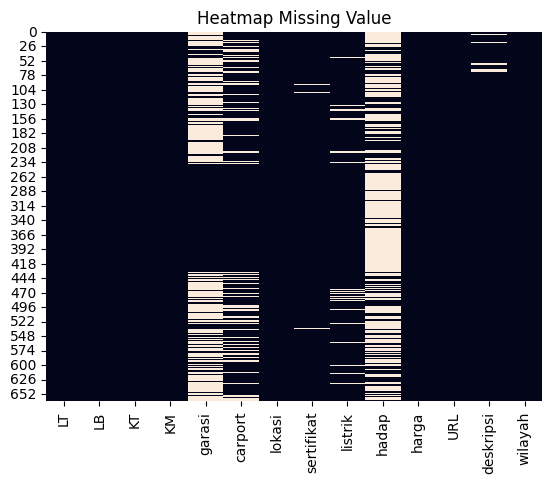

In [20]:
# Memeriksa missing value dengan heatmap
sns.heatmap(df_all.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

Heatmap di atas menunjukkan sebaran missing value (nilai kosong) dalam dataset gabungan. Setiap garis horizontal merepresentasikan satu baris data, dan setiap kolom vertikal merepresentasikan satu kolom data. Warna putih menandakan adanya missing value pada sel tersebut. Terlihat jelas bahwa beberapa kolom memiliki banyak missing value. Untuk mendapatkan gambaran yang lebih kuantitatif, mari kita lihat persentase missing value per kolom.

In [21]:
# Melihat perhitungan persentase missing value (nilai kosong) untuk setiap kolom dalam DataFrame
df_all.isnull().sum()/len(df_all)*100

,0
LT,0.000000
LB,0.000000
KT,0.000000
KM,0.150830
garasi,49.773756
carport,17.043741
lokasi,0.000000
sertifikat,0.754148
listrik,5.279035
hadap,67.722474


Berdasarkan persentase missing value yang telah dihitung, terlihat bahwa beberapa kolom memiliki missing value yang signifikan. Langkah selanjutnya adalah menangani missing value ini dengan metode yang sesuai untuk setiap kolom. Dalam hal ini kita gunakan metode Imputasi

In [22]:
# Mengisi missing values
# Mengisi missing values dengan 0 untuk kolom KM, garasi, dan carport
df_all["KM"] = df_all["KM"].fillna(0)
df_all["garasi"] = df_all["garasi"].fillna(0)
df_all["carport"] = df_all["carport"].fillna(0)

# Mengisi missing values dengan nilai modus untuk kolom sertifikat
df_all["sertifikat"] = df_all["sertifikat"].fillna("Lainnya") # Mengisi missing values dengan "Lainnya"

# Mengisi missing values dengan "-" untuk kolom deskripsi dan hadap
df_all["deskripsi"] = df_all["deskripsi"].fillna("-")
df_all["hadap"] = df_all["hadap"].fillna("-")

# Mengisi missing values dengan nilai median untuk kolom listrik
df_all["listrik"] = df_all["listrik"].fillna(df_all["listrik"].median())

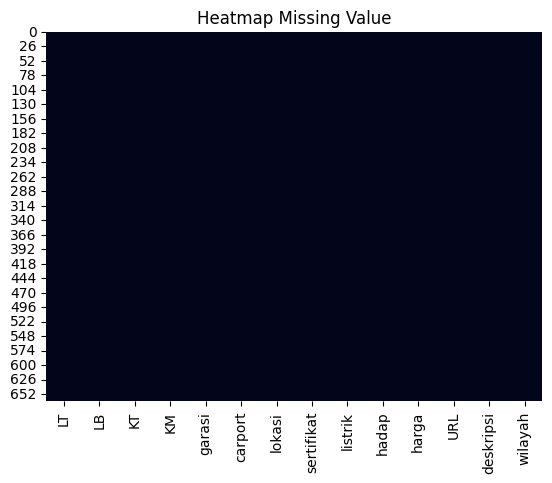

In [23]:
# Kondisi heatmap setelah pananganan MV
sns.heatmap(df_all.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

In [24]:
df_all.isnull().sum()/len(df_all)*100

,0
LT,0.0
LB,0.0
KT,0.0
KM,0.0
garasi,0.0
carport,0.0
lokasi,0.0
sertifikat,0.0
listrik,0.0
hadap,0.0


In [25]:
# Cek nilai unik dan jumlahnya pada kolom 'lokasi'
print("Nilai unik pada kolom 'lokasi':")
print(df_all['lokasi'].value_counts())

# Cek nilai unik dan jumlahnya pada kolom 'sertifikat'
print("\nNilai unik pada kolom 'sertifikat':")
print(df_all['sertifikat'].value_counts())

# Cek nilai unik dan jumlahnya pada kolom 'hadap'
print("\nNilai unik pada kolom 'hadap':")
print(df_all['hadap'].value_counts())

# Cek nilai unik dan jumlahnya pada kolom 'wilayah'
print("\nNilai unik pada kolom 'wilayah':")
print(df_all['wilayah'].value_counts())

Nilai unik pada kolom 'lokasi':
lokasi
Kota Bekasi                   73
Kabupaten Bekasi              34
Sawangan                      30
BSD, TANGERANG                27
Gunung Putri                  26
                              ..
Poris, Tangerang               1
SEPATAN, TANGERANG             1
Ranca Bungur                   1
SERPONG, TANGERANG SELATAN     1
Tenjo                          1
Name: count, Length: 86, dtype: int64

Nilai unik pada kolom 'sertifikat':
sertifikat
SHM                                552
SHGB                                41
HGB                                 20
lainnya(PPJB, GIRIK, ADAT, dll)     15
Lainnya                             12
SHM + IMB                           11
PPJB                                 7
SHM,IMB                              2
SHM + Hak Pakai                      1
SHM + IMB + PBB                      1
AJB                                  1
Name: count, dtype: int64

Nilai unik pada kolom 'hadap':
hadap
-                  

In [26]:
# Memeriksa Noise pada sertifikat
wilayah = ["Jakarta", "Depok", "Bogor", "Tangerang", "Bekasi"] # Define 'wilayah' here
l = []
for i in wilayah:
  print(i)
  l += list(df_all[df_all["wilayah"] == i]["sertifikat"].unique())
  print(l)

k = []
for i in l:
  if i != "SHM":
    k.append(i)
k

Jakarta
['SHM', 'SHGB', 'SHM + IMB', 'SHM + IMB + PBB', 'SHM + Hak Pakai', 'PPJB', 'Lainnya', 'AJB']
Depok
['SHM', 'SHGB', 'SHM + IMB', 'SHM + IMB + PBB', 'SHM + Hak Pakai', 'PPJB', 'Lainnya', 'AJB', 'SHM', 'Lainnya']
Bogor
['SHM', 'SHGB', 'SHM + IMB', 'SHM + IMB + PBB', 'SHM + Hak Pakai', 'PPJB', 'Lainnya', 'AJB', 'SHM', 'Lainnya', 'SHM', 'SHGB', 'Lainnya']
Tangerang
['SHM', 'SHGB', 'SHM + IMB', 'SHM + IMB + PBB', 'SHM + Hak Pakai', 'PPJB', 'Lainnya', 'AJB', 'SHM', 'Lainnya', 'SHM', 'SHGB', 'Lainnya', 'SHM', 'HGB', 'Lainnya', 'lainnya(PPJB, GIRIK, ADAT, dll)']
Bekasi
['SHM', 'SHGB', 'SHM + IMB', 'SHM + IMB + PBB', 'SHM + Hak Pakai', 'PPJB', 'Lainnya', 'AJB', 'SHM', 'Lainnya', 'SHM', 'SHGB', 'Lainnya', 'SHM', 'HGB', 'Lainnya', 'lainnya(PPJB, GIRIK, ADAT, dll)', 'SHM', 'HGB', 'SHM,IMB', 'Lainnya']


['SHGB',
 'SHM + IMB',
 'SHM + IMB + PBB',
 'SHM + Hak Pakai',
 'PPJB',
 'Lainnya',
 'AJB',
 'Lainnya',
 'SHGB',
 'Lainnya',
 'HGB',
 'Lainnya',
 'lainnya(PPJB, GIRIK, ADAT, dll)',
 'HGB',
 'SHM,IMB',
 'Lainnya']

In [27]:
# penanganan Noise sertfikat
for i in k:
  df_all["sertifikat"] = df_all["sertifikat"].replace(i, "Lainnya")

In [28]:
list(df_all["sertifikat"].unique()) # kondisi setelah penanganan noise

['SHM', 'Lainnya']

kolom sertifikat memiliki banyak variasi nilai (SHGB, HGB, PPJB, AJB, SHM + IMB, dsb) dianggap noise, sehingga kita mengelompokkan semua jenis sertifikat non-SHM ke dalam satu kategori “Lainnya”, sehingga hasil akhir lebih sederhana

In [29]:
# periksa noise pada URL apakah ada yang bukan link
urllist= list(df_all["URL"].unique())
noturl = []
for i in urllist:
  if "http" not in i:
    noturl.append(i)
    print(i)
    noturl

Rumah murah di metland cibitung bekasi - Dijual: Rumah & Apartemen - 840087312 (olx.co.id)
Rumah dijual di Griya gandasari cibitung - Dijual: Rumah & Apartemen - 840088652 (olx.co.id)
Jual cepat rumah huuk di metland cibitung bekasi - Dijual: Rumah & Apartemen - 840592462 (olx.co.id)
Rumah krem harga murah di Taman Wisma Asri 2 dekat Sumarecon Bekasi - Dijual: Rumah & Apartemen - 849295145 (olx.co.id)
Rumah Bagus Full Renov di Harapan Indah Bekasi - Dijual: Rumah & Apartemen - 849293743 (olx.co.id)
RUMAH FRESH MANIS SIAP HUNI di Taman Wanasari Indah Cibitung - Dijual: Rumah & Apartemen - 849215260 (olx.co.id)
Rumah Cantik Siap Huni Tanah Luas Akses 2 Mobil Murah di Bekasi - hos9285628 | Rumah123.com


Terdapat Non-link pada kolom URL, namun ada domain dari tempat rumah tersebut dijual serta judul iklan. Oleh karena itu, menganggapnya bukan sebagai noise pada kolom tersebut.

<Axes: xlabel='harga'>

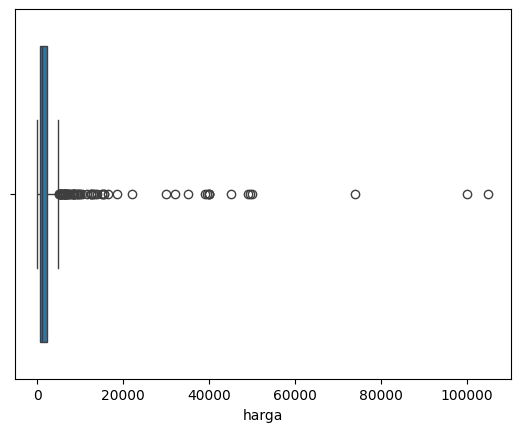

In [30]:
# Memeriksa Outlier pada kolom Harga
sns.boxplot(x="harga", data=df_all)

In [31]:
# Mengolah outlier dengan median pada tiap wilayah dan memisahkannya dari data tanpa outlier
datagab_no_outlier = pd.DataFrame({
    'LT': [],         # Luas Tanah
    'LB': [],         # Luas Bangunan
    'KT': [],         # Kamar Tidur
    'KM': [],         # Kamar Mandi
    'garasi': [],     # Garasi
    'carport': [],    # Carport
    'lokasi': [],     # Lokasi
    'sertifikat': [], # Sertifikat (HGB/SHM)
    'listrik': [],    # Daya listrik
    'hadap': [],      # Arah rumah (hadap ke arah mana)
    'harga': [],      # Harga rumah
    'URL': [],        # Link URL properti
    'deskripsi': [],  # Deskripsi properti
    'wilayah': []     # Wilayah/lokasi geografis
})

datagab_outlier = pd.DataFrame({
    'LT': [],         # Luas Tanah
    'LB': [],         # Luas Bangunan
    'KT': [],         # Kamar Tidur
    'KM': [],         # Kamar Mandi
    'garasi': [],     # Garasi
    'carport': [],    # Carport
    'lokasi': [],     # Lokasi
    'sertifikat': [], # Sertifikat (HGB/SHM)
    'listrik': [],    # Daya listrik
    'hadap': [],      # Arah rumah (hadap ke arah mana)
    'harga': [],      # Harga rumah
    'URL': [],        # Link URL properti
    'deskripsi': [],  # Deskripsi properti
    'wilayah': []     # Wilayah/lokasi geografis
})

wilayah = ["Jakarta", "Depok", "Bogor", "Tangerang", "Bekasi"]

for i in wilayah:
  Q1harga = df_all[df_all["wilayah"] == i]["harga"].quantile(0.25)
  Q3harga = df_all[df_all["wilayah"] == i]["harga"].quantile(0.75)
  IQRharga = Q3harga - Q1harga

  lower_boundharga = Q1harga - 1.5 * IQRharga
  upper_boundharga = Q3harga + 1.5 * IQRharga

  bersih = (df_all[df_all["wilayah"] == i]["harga"] >= lower_boundharga) & (df_all[df_all["wilayah"] == i]["harga"] <= upper_boundharga)
  dfno_outlier = df_all[df_all["wilayah"] == i][bersih]
  dfoutlier = df_all[df_all["wilayah"] == i][~bersih]

  datagab_no_outlier = pd.concat([datagab_no_outlier, dfno_outlier], ignore_index=True)
  datagab_outlier = pd.concat([datagab_outlier, dfoutlier], ignore_index=True)

/tmp/ipython-input-3969738562.py:50: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  datagab_no_outlier = pd.concat([datagab_no_outlier, dfno_outlier], ignore_index=True)
/tmp/ipython-input-3969738562.py:50: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  datagab_no_outlier = pd.concat([datagab_no_outlier, dfno_outlier], ignore_index=True)
/tmp/ipython-input-3969738562.py:51: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this 

In [32]:
from geopy.geocoders import Nominatim

# Inisialisasi geocoder dengan user_agent yang lebih spesifik
geolocator = Nominatim(user_agent="my-geocoding-app") # Changed to a more descriptive user agent

data = {
    'longitude': [],
    'latitude': [],
    'mean': [] ,
    'wilayah': []
}
for i in wilayah:
  try:
    lokasi = geolocator.geocode(i)
    if lokasi:
      data['longitude'].append(lokasi.longitude)
      data['latitude'].append(lokasi.latitude)
      data['mean'].append(datagab_no_outlier[datagab_no_outlier["wilayah"] == i]["harga"].mean())
      data['wilayah'].append(i)
    else:
      print("Lokasi tidak ditemukan.")
  except GeocoderInsufficientPrivileges:
    print("Error: GeocoderInsufficientPrivileges. Periksa user-agent dan pastikan tidak melebihi batas permintaan.")
  except Exception as e:
    print(f"Error: {e}")

data = pd.DataFrame(data)
data

,longitude,latitude,mean,wilayah
0,106.827168,-6.175405,3607.719543,Jakarta
1,106.815837,-6.407190,805.962963,Depok
2,106.797242,-6.596299,743.722841,Bogor
3,106.638216,-6.176192,2255.657895,Tangerang
4,106.994544,-6.234986,979.282515,Bekasi


In [33]:
import folium
# Inisialisasi peta folium (fokus pada lokasi pertama)
m = folium.Map(location=[-6.407190	, 106.815837], zoom_start=10)
colors = ['orange', 'blue', 'green', 'red', 'brown']
# Tambahkan marker untuk setiap lokasi berdasarkan data
for idx, row in data[["latitude", "longitude", "mean"]].iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=row['mean']/80,  # Skala ukuran berdasarkan mean
        color = colors[idx],
        fill=True,
        fill_color=colors[idx],
        fill_opacity=0.6,
        popup=f"Mean: {row['mean']:.2f}"
    ).add_to(m)

# Simpan peta sebagai file HTML
m.save('map.html')

# Untuk menampilkan peta
m

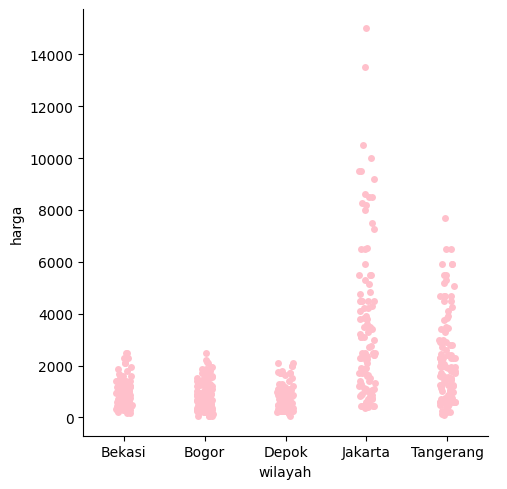

In [34]:
catp = sns.catplot(x="wilayah", y="harga", data=datagab_no_outlier, color="pink")


# Insight


**Kualitas data yang dimiliki perusahaan.**
- Data memiliki banyak missing value, tiap kota memiliki missing value lebih dari setengahnya.
- Satuan harga tidak dijelaskan apakah dalam ratus, juta, atau miliyar.
- Terdapat kolom dengan satuan numerik yang berbeda antar kota, yakni harga rumah kota depok dan Tangerang berbeda dengan kota lainnya.
- Kurangnya keterangan tentang data, pada LB tidak diberitahukan tipe rumah berapa tingkat.
- Terdapat entri format "lokasi" antar kota yang berbeda-beda, ada yang berdasarkan kecamatan, kota, bahkan nama jalan.

**Saran perbaikan data ke DE/DBA perusahaan agar RPPI menjadi data driven company yang unggul.**
- Menerapkan format standar untuk semua data agar data menjadi lebih konsisten.
- Menerapkan kebijakan tata kelola data yang ketat. Setiap tim, termasuk DE dan DBA, harus bertanggung jawab untuk menjaga kebersihan data. Termasuk menetapkan pedoman yang jelas tentang pengelolaan, pembaruan, dan pemeliharaan data.
- Lebih spesifik dalam memberikan informasi tentang data.


**Dari data yang ada, apakah ada kecenderungan rumah disuatu kota lebih mahal/murah dibandingkan kota lain?**

Berdasarkan map plot dan catplot di atas diperoleh terdapat kecenderungan harga rumah lebih mahal di wilayah Jakarta  dan harga lebih murah di wilayah Bogor, Bekasi, dan Depok.

**Dari data yang ada, apakah bisa dibuat rekomendasi sebaiknya RPPI membuat kantor cabang berikutnya di kota mana? Mengapa? (Asumsikan RPPI belum memiliki cabang di kota-kota yang disebutkan di data).**

Berdasarkan analisis data yang ada, disarankan agar RPPI membuka kantor cabang berikutnya di Kota Depok. Berikut adalah alasan utama pemilihan lokasi ini:

- Letak Geografis yang Strategis: Depok terletak di persimpangan berbagai wilayah penting di Jabodetabek, membuatnya lebih mudah diakses oleh klien dari berbagai daerah. Ini akan mempermudah interaksi dengan klien dan memperluas jangkauan pasar.
- Rerata Harga Rumah yang Kompetitif: Rerata harga rumah di Depok relatif lebih terjangkau dibandingkan dengan Jakarta dan beberapa wilayah lainnya di Jabodetabek. Ini menjadikan Depok sebagai pilihan menarik bagi masyarakat yang mencari properti, serta memberikan peluang untuk investasi yang menguntungkan bagi RPPI.
- Potensi Kolaborasi: Lokasi yang strategis di Depok memungkinkan RPPI untuk menjalin kemitraan dengan pengembang lokal dan perusahaan terkait lainnya, yang dapat meningkatkan visibilitas dan kredibilitas RPPI di pasar.

Dengan mempertimbangkan faktor-faktor di atas, membuka kantor cabang di Kota Depok dapat menjadi langkah strategis yang tidak hanya meningkatkan jangkauan pasar RPPI tetapi juga memanfaatkan potensi pertumbuhan yang ada di wilayah tersebut.

In [35]:
df_all[["LT", "LB", "KM", "KT", "garasi","carport"]].mode()

,LT,LB,KM,KT,garasi,carport
0,60.0,36.0,2.0,2.0,0.0,1.0


**Rumah dengan karakteristik seperti apa yang paling banyak dijual?**

Interpretasi dari hasil ini adalah sebagai berikut:

- LT (Luas Tanah): Nilai 60, yang berarti bahwa rumah dengan luas tanah 60 m² paling sering muncul dalam data penjualan.
- LB (Luas Bangunan): Nilai 36, yang menunjukkan bahwa rumah dengan luas bangunan 36 m² paling sering terjual.
- KM (Jumlah Kamar Mandi): Nilai 2, menunjukkan bahwa rumah dengan 2 kamar mandi paling sering terjual.
- KT (Jumlah Kamar Tidur): Nilai 2, menunjukkan bahwa rumah dengan 2 kamar tidur paling sering terjual.
- garasi: Nilai 0, menunjukkan bahwa rumah tanpa garasi paling sering terjual.
- carport: Nilai 1, menunjukkan bahwa rumah dengan 1 carport paling sering terjual.

Jadi, rumah dengan karakteristik yang paling sering terjual adalah rumah dengan luas tanah 60 m², luas bangunan 36 m², 2 kamar mandi, 2 kamar tidur, tanpa garasi, dan memiliki 1 carport.

In [36]:
# melakukan filtering database berdasarkan kriteria variabel
filtered_df = df_all[
    (df_all['KM'] >= 1) & (df_all['KM'] <= 2) &  # Kondisi untuk Kamar Mandi
    (df_all['KT'] >= 1) & (df_all['KT'] <= 3) &  # Kondisi untuk Kamar Tidur
    (df_all['garasi'] >= 0) & (df_all['garasi'] <= 1) &  # Kondisi untuk Garasi
    (df_all['carport'] >= 0) & (df_all['carport'] <= 2) &  # Kondisi untuk Carport
    (df_all['LB'] >= 80) & (df_all['LB'] <= 150) & # Kondisi untuk Luas Bangunan
    (df_all['harga'] <= 1000) & # Kondisi untuk Harga
    (df_all['LT'] <= 100) & (df_all['LB'] <= 200)# Kondisi untuk Wilayah
]
filtered_df.shape


(22, 14)

In [37]:
filtered_df['harga'].sum()

np.float64(16462.022)

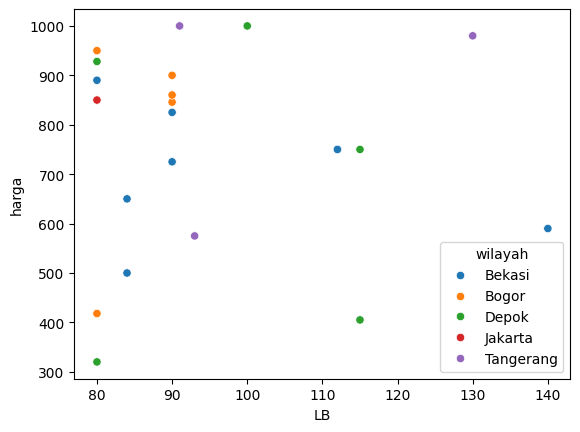

In [38]:
# menganalisa outlier dengan catplot
#catp = sns.catplot(x = "wilayah", y = "harga", data = filtered_df)
p = sns.scatterplot(y=filtered_df['harga'], x=filtered_df['LB'], hue = filtered_df['wilayah'])

**Jika RPPI ingin melakukan investasi (max) Rp. 25 Milyar minggu besok, apakah dari data anda dapat memberikan rekomendasi rumah mana saja yang akan berpotensi menghasilkan keuntungan bagi perusahaan?**

Berdasarkan kriteria yang telah ditentukan dan hasil analisis, berikut adalah insight terkait investasi RPPI dengan maksimum anggaran Rp 25 Miliar:

Insight Investasi untuk RPPI

- Jumlah Properti Tersedia: Dari filter yang diterapkan, terdapat 29 rumah yang memenuhi kriteria yang ditentukan. Ini menunjukkan ada pilihan yang cukup untuk diinvestasikan, memberikan fleksibilitas dalam pemilihan properti.
- Total Investasi: Total harga dari properti yang terfilter adalah Rp 22,46 Miliar. Ini masih di bawah batas maksimum investasi yang ditetapkan yaitu Rp 29 Miliar, sehingga RPPI masih memiliki ruang untuk memilih atau bahkan melakukan tawar-menawar untuk mendapatkan harga yang lebih baik jika diperlukan.
- Karakteristik Properti: -- Kamar Mandi dan Kamar Tidur: Properti yang terpilih memiliki 1-2 kamar mandi dan 1-3 kamar tidur. Ini menunjukkan bahwa rumah-rumah ini cocok untuk keluarga kecil, sehingga dapat menarik pembeli atau penyewa yang mencari rumah dengan ukuran yang tidak terlalu besar. -- Garasi dan Carport: Dengan maksimum satu garasi dan dua carport, rumah-rumah ini dapat menarik pembeli yang memprioritaskan ruang parkir tetapi tidak membutuhkan banyak tempat parkir, sesuai dengan kebutuhan pasar di banyak kota. -- Luas Bangunan: Luas bangunan antara 75-120 m² menunjukkan bahwa properti ini sesuai untuk pasar menengah, menawarkan kenyamanan dengan biaya yang relatif terjangkau. -- Harga: Harga maksimum dari properti yang difilter adalah di bawah Rp 1 Miliar, sehingga tetap dalam jangkauan pembeli yang berada di segmen menengah ke bawah.

Dengan karakteristik yang ada, investasi di rumah-rumah ini berpotensi menghasilkan keuntungan yang baik dalam jangka pendek hingga menengah, baik melalui penyewaan atau penjualan kembali.

<Axes: xlabel='harga'>

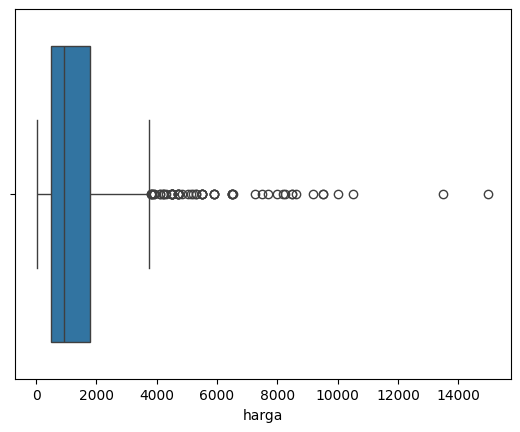

In [39]:
# Memeriksa Outlier pada kolom Harga
sns.boxplot(x="harga", data=datagab_no_outlier)


In [40]:
datagab_no_outlier["harga"].describe()

,harga
count,604.000000
mean,1578.267261
std,1838.246829
min,41.000000
25%,500.000000
50%,920.000000
75%,1800.000000
max,15000.000000


**Kisaran harga di wilayah jabodetabek**

Meskipun telah dilakukan pemisahan outlier pada setiap wilayah jabodetabek, namun tetap ditemukan outlier yang cukup banyak, tetapi memiliki persebaran harga rumah di jabodetabek berkisar antara 41 juta sampai 15 miliar.

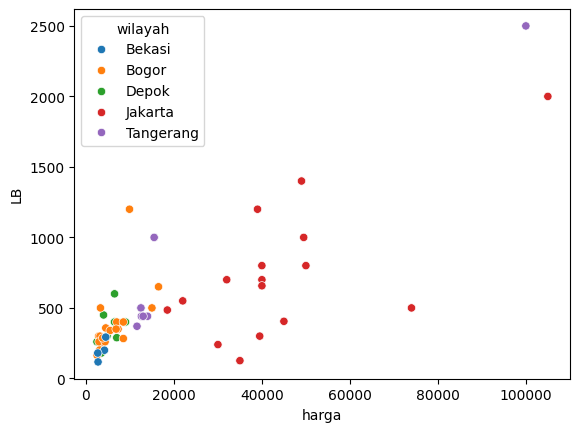

In [41]:
p = sns.scatterplot(x=datagab_outlier['harga'], y=datagab_outlier['LB'], hue = datagab_outlier['wilayah'])


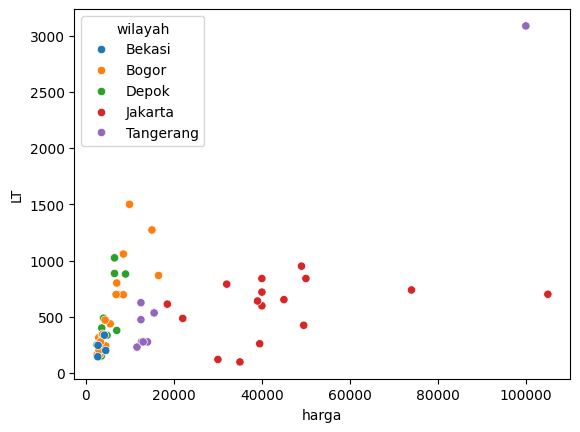

In [42]:
p = sns.scatterplot(x=datagab_outlier['harga'], y=datagab_outlier['LT'], hue = datagab_outlier['wilayah'])


Berdasarkan dua plot di atas, terdapat informasi penting mengenai rumah dengan harga yang sangat tinggi di wilayah Jabodetabek:

- Luas Bangunan dan Tanah: Kebanyakan rumah dengan harga tinggi memiliki luas bangunan dan luas tanah lebih dari 1.000 meter persegi, yang menunjukkan bahwa properti ini menawarkan ruang yang lebih luas dan potensi untuk pengembangan.

- Potensi Harga: -- Di wilayah selain Jakarta, harga rumah berkisar antara 2,5 miliar hingga 20 miliar. -- Di Jakarta, rumah dengan spesifikasi serupa dapat memiliki harga mulai dari puluhan hingga ratusan miliar.

Dengan demikian, RPPI dapat mempertimbangkan untuk berinvestasi pada rumah-rumah dengan karakteristik di atas, mengingat potensi harga yang sangat besar. Investasi ini tidak hanya berfokus pada pasar Jabodetabek, tetapi juga dapat diperluas untuk menyasar kalangan masyarakat atas di luar wilayah tersebut.